#**Divide & Conquer**

#**Installations and Imports**

In [79]:
import time

dghj

import math

import numpy as np

import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

#**Helper Functions**

In [80]:
def generate_random_numbers(n, low, high, seed=12345, sort=False):
    """
    Generate a list of n random integer numbers within a given range.

    Parameters:
    n (int): The number of random numbers to generate.
    low (int): The lower limit of the range.
    high (int): The upper limit of the range.
    seed (int, optional): The seed for the random number generator.
    sort (bool, optional): Whether to sort the numbers.

    Returns:
    numpy.ndarray: A numpy array of random numbers.
    """

    generator = np.random.default_rng(seed)

    # Generate n random integers in the range [low, high)
    random_numbers = generator.integers(low, high, size=n)

    if sort:
        random_numbers = np.sort(random_numbers)

    return random_numbers

In [81]:
def visualize_distribution(random_numbers, bins = 'auto', figsize=(12, 6)):
    """
    Function to visualize the distribution of a list of numbers through a line chart and a histogram.

    Parameters:
    random_numbers (list or numpy array): The input list of numbers.
    bins: Optional argument to set bin size. Default is auto.
    figsize (tuple): Optional argument to set the size of the figure. Default is (12, 6).

    Returns:
    None
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Line plot
    axes[0].plot(np.arange(len(random_numbers)), random_numbers, label = 'distribution')
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel('Value')

    # Histogram
    axes[1].hist(random_numbers, bins = bins, label = 'histogram')
    axes[1].set_xlabel('Bin')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

#**Generating Random Numbers**

In [82]:
# Generating Random Integers

n = 100

low = 2

high = 100

random_numbers = generate_random_numbers(n = n, low = low, high = high, sort = False)

print(random_numbers)

[70 24 79 33 22 80 64 68 98 40 84 34 57 60 22 20 24 67 62 94 71 26 91 94
 73 67 14 11 28 45  9 88 48 70 22 33 13 73 77 23 72  9 40 17 74 35 48 47
 48 28 56 81 50 20  4 14  9 10 14 60 81 85 66 60 34 93 64 73 73 86 70 93
 55 55 26 93 56 50 33 28 64 46 57 67 90 34 68 90 46 27 30 35 63 27 84 36
  8  2  4 63]


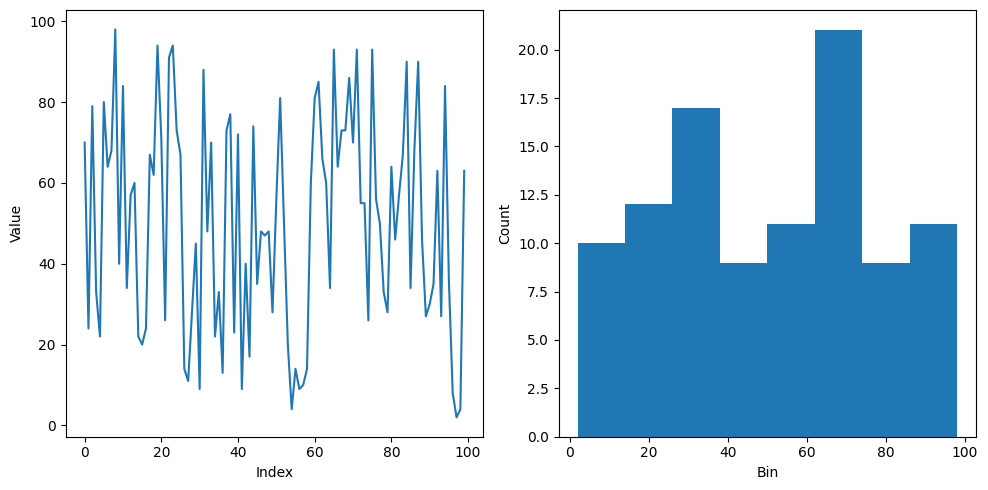

In [83]:
visualize_distribution(random_numbers, figsize = (10, 5))

#**Finding Maximum [A Bad Example][But Demonstrates Divide & Conquer Approach]**

**Find Max O(n)**

In [84]:
def find_max(numbers):
    """
    Find the index of the maximum number in a list using iteration.

    Parameters:
    numbers (list): List of numbers.

    Returns:
    max_index (int): The index of the maximum number in the list. Returns -1 if the list is empty.
    """

    max_value = numbers[0]

    max_index = 0

    for i, num in enumerate(numbers[1:], start=1):

        if num > max_value:

            max_value = num

            max_index = i

    return max_index

In [85]:
key  = 15

index = find_max(random_numbers)

print(index)

8


**Find Max using Divide & Conquer O(nlogn)**

In [86]:
def find_max_dac(numbers, start_index, end_index):
    """
    Find the index of the maximum number in a list using divide and conquer strategy.

    Parameters:
    numbers (list): List of numbers.
    start_index (int): The starting index for the search.
    end_index (int): The ending index for the search.

    Returns:
    max_index (int): The index of the maximum number in the list.
    """

    # Base case: if there is only one element, return the current index
    if start_index == end_index:
        return start_index

    # Divide and Conquer case: find the index of the maximum in the left and right halves and return the larger one
    mid_index = (start_index + end_index) // 2
    left_max_index = find_max_dac(numbers, start_index, mid_index)
    right_max_index = find_max_dac(numbers, mid_index + 1, end_index)
    return left_max_index if numbers[left_max_index] > numbers[right_max_index] else right_max_index


In [87]:
key  = 15

index = find_max_dac(random_numbers, 0, len(random_numbers) - 1)

print(index)

8


#**Calculating Power, a<sup>n</sup>**

**Power, a<sup>n</sup> O(n)**

In [88]:
def power(a, n):
    """
    Compute the power of a number using an iterative strategy.

    Parameters:
    a (float): Base number.
    n (int): Exponent. It should be a non-negative integer.

    Returns:
    result (float): The result of a^n.
    """
    result = 1
    for _ in range(n):
        result *= a
    return result

In [89]:
print(power(2, 9))  # Should print 1024

512


**Power, a<sup>n</sup> using Divide & Conquer O(log n)**

In [90]:
def power_binary_exponentiation_dac(a, n):
    """
    Compute the power of a number using a divide and conquer strategy.

    Parameters:
    a (float): Base number.
    n (int): Exponent. It should be a non-negative integer.

    Returns:
    result (float): The result of a^n.
    """
    # Base case: a^0 is always 1
    if n == 0:
        return 1

    half_power = power_binary_exponentiation_dac(a, n // 2)

    if n % 2 == 0:

        return half_power * half_power

    else:
        return a * half_power * half_power

In [91]:
print(power_binary_exponentiation_dac(2, 9))  # Should print 512

512


#**Finding n-th Fibonacci**

**Find n-th Fibonacci using Binet's Formula [Golden Ratio][Unreliable] O(1)**

In [92]:
def fibonacci_golden_ratio(n):
    """
    Calculate the nth Fibonacci number using the golden ratio (also known as Binet's formula).

    Parameters:
    n (int): The position of the Fibonacci number to calculate.

    Returns:
    (int): The nth Fibonacci number.
    """
    golden_ratio = (1 + math.sqrt(5)) / 2
    return int((golden_ratio ** n - (1 - golden_ratio) ** n) / math.sqrt(5))

In [93]:
n = 73

print(fibonacci_golden_ratio(n))

806515533049395


**Find n-th Fibonacci Step by Step O(n)**

In [94]:
def fibonacci_iterative(n):
    """
    Calculate the nth Fibonacci number using an iterative method.

    Parameters:
    n (int): The position of the Fibonacci number to calculate.

    Returns:
    (int): The nth Fibonacci number.

    Time complexity: O(n)
    """
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        a, b = 0, 1
        for _ in range(2, n + 1):
            a, b = b, a + b
        return b

In [95]:
n = 73

print(fibonacci_iterative(n))

806515533049393


**Find n-th Fibonacci using Recursive Squaring Divide & Conquer O(log n)**

In [96]:
def matrix_multiply(matrix1, matrix2):
    """
    Multiply two 2x2 matrices.

    Parameters:
    matrix1 (list): First 2x2 matrix.
    matrix2 (list): Second 2x2 matrix.

    Returns:
    (list): The result of the multiplication of the two input matrices.
    """
    a, b, c, d = matrix1[0][0], matrix1[0][1], matrix1[1][0], matrix1[1][1]
    e, f, g, h = matrix2[0][0], matrix2[0][1], matrix2[1][0], matrix2[1][1]

    x = a * e + b * g
    y = a * f + b * h
    z = c * e + d * g
    w = c * f + d * h

    return [[x, y], [z, w]]

def matrix_power(matrix, power):
    """
    Raise a 2x2 matrix to a power using divide and conquer.

    Parameters:
    matrix (list): 2x2 matrix.
    power (int): The power to raise the matrix to.

    Returns:
    (list): The input matrix raised to the power of the input power.
    """
    if power == 0:
        return [[1, 0], [0, 1]]
    elif power == 1:
        return matrix
    elif power % 2 == 0:
        half_power = matrix_power(matrix, power // 2)
        return matrix_multiply(half_power, half_power)
    else:
        return matrix_multiply(matrix, matrix_power(matrix, power - 1))

def fibonacci_recursive_squaring(n):
    """
    Calculate the nth Fibonacci number using the method of recursive squaring.

    Parameters:
    n (int): The position of the Fibonacci number to calculate.

    Returns:
    (int): The nth Fibonacci number.
    """
    if n <= 0:
        return 0
    else:
        return matrix_power([[1, 1], [1, 0]], n - 1)[0][0]

In [97]:
n = 73

print(fibonacci_recursive_squaring(n))

806515533049393


#**Matrix Multiplication**

**Matrix Multiplication O(n<sup>3</sup>)**

In [98]:
def matrix_multiply(matrix1, matrix2):
    """
    Multiply two matrices matrix1 and matrix2.

    Parameters:
    matrix1, matrix2 (list of lists): Matrices to be multiplied.

    Returns:
    result (list of lists): The result of the multiplication.
    """
    n = len(matrix1)
    result = [[0 for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

    return result

In [99]:
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [1, 2, 3, 4],
              [5, 6, 7, 8]])

B = np.array([[8, 9, 10, 11],
              [12, 13, 14, 15],
              [1, 2, 3, 4],
              [5, 6, 7, 8]])

print(np.array(matrix_multiply(A, B)))

[[ 55  65  75  85]
 [159 185 211 237]
 [ 55  65  75  85]
 [159 185 211 237]]


**Matrix Multiplication using Divide & Conquer O(n<sup>2.8</sup>)**

In [100]:
def split(matrix):
    """
    Function that splits a given square matrix into four equal-sized submatrices.

    Parameters:
    matrix (numpy.ndarray): The input matrix of size nxn.

    Returns:
    tuple: A tuple containing four submatrices.
    """
    # Determine midpoint of matrix
    row, col = matrix.shape
    mid_row, mid_col = row//2, col//2

    # Split matrix into four quarters
    top_left = matrix[:mid_row, :mid_col]
    top_right = matrix[:mid_row, mid_col:]
    bot_left = matrix[mid_row:, :mid_col]
    bot_right = matrix[mid_row:, mid_col:]

    return top_left, top_right, bot_left, bot_right


def strassen(x, y):
    """
    Function that performs matrix multiplication using Strassen's algorithm.

    Parameters:
    x (numpy.ndarray): The first input matrix of size nxn.
    y (numpy.ndarray): The second input matrix of size nxn.

    Returns:
    numpy.ndarray: The product of the two matrices, a matrix of size nxn.
    """
    # Base case when size of matrices is 1x1
    if len(x) == 1:
        return x * y

    # Splitting the matrices into quadrants. This will be done recursively
    # until the base case is reached.
    a, b, c, d = split(x)
    e, f, g, h = split(y)

    # Compute the seven products, recursively. These correspond to the seven
    # equations in Strassen's algorithm.
    p1 = strassen(a, f - h)  # p1 = a*(f-h)
    p2 = strassen(a + b, h)  # p2 = (a+b)*h
    p3 = strassen(c + d, e)  # p3 = (c+d)*e
    p4 = strassen(d, g - e)  # p4 = d*(g-e)
    p5 = strassen(a + d, e + h)  # p5 = (a+d)*(e+h)
    p6 = strassen(b - d, g + h)  # p6 = (b-d)*(g+h)
    p7 = strassen(a - c, e + f)  # p7 = (a-c)*(e+f)

    # Calculate the four quadrants of the resulting matrix
    c11 = p5 + p4 - p2 + p6  # c11 = p5 + p4 - p2 + p6
    c12 = p1 + p2  # c12 = p1 + p2
    c21 = p3 + p4  # c21 = p3 + p4
    c22 = p1 + p5 - p3 - p7  # c22 = p1 + p5 - p3 - p7

    # Combine the four quadrants into a single matrix by stacking them
    # vertically and horizontally.
    c = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))

    return c


def matrix_multiplication_dac(A, B):
    """
    Caller function to perform matrix multiplication using Strassen's algorithm.

    Parameters:
    A (numpy.ndarray): The first input matrix of size nxn.
    B (numpy.ndarray): The second input matrix of size nxn.

    Returns:
    numpy.ndarray: The product of the two matrices, a matrix of size nxn.
    """
    return strassen(A, B)

In [101]:
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [1, 2, 3, 4],
              [5, 6, 7, 8]])

B = np.array([[8, 9, 10, 11],
              [12, 13, 14, 15],
              [1, 2, 3, 4],
              [5, 6, 7, 8]])

print(np.array(matrix_multiplication_dac(A, B)))

[[ 55  65  75  85]
 [159 185 211 237]
 [ 55  65  75  85]
 [159 185 211 237]]
